In [2]:
# 1. Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Charger le dataset
df = pd.read_csv('/content/DATA SET -Customer-Churn-Records.csv')

# 3. Aperçu des premières lignes
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
# Supprimer les colonnes inutiles
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Vérifier le résultat
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
# Compter les valeurs manquantes par colonne
df.isnull().sum()


,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [5]:
# Voir les types de chaque colonne
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [6]:
# 1. Encodage Gender (binaire)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# 2. Encodage one-hot Geography et Card Type
df = pd.get_dummies(df, columns=['Geography', 'Card Type'], drop_first=True)

# Vérifier le résultat
df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,True,False,False


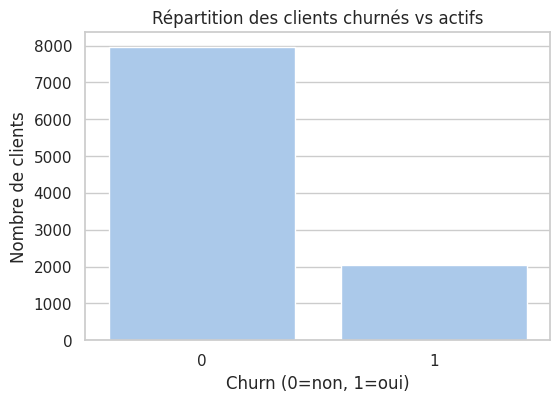

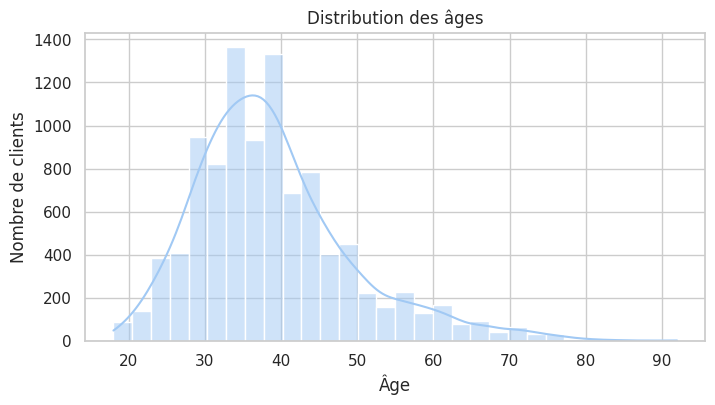

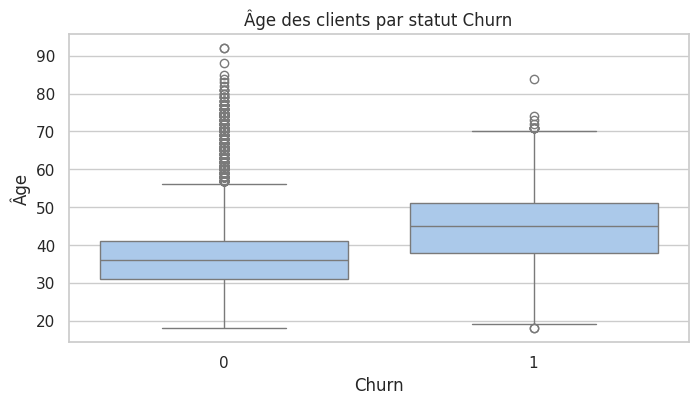

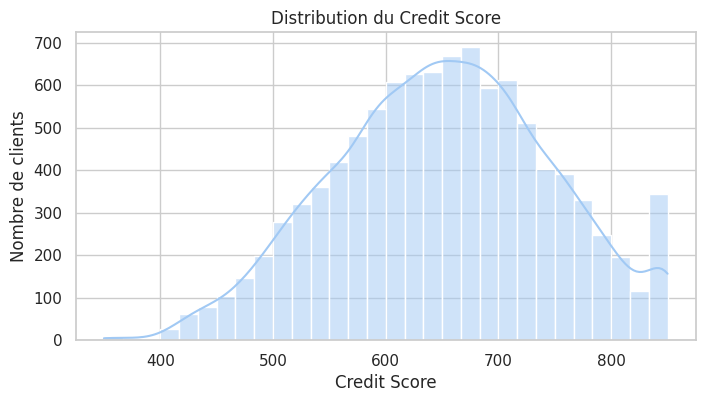

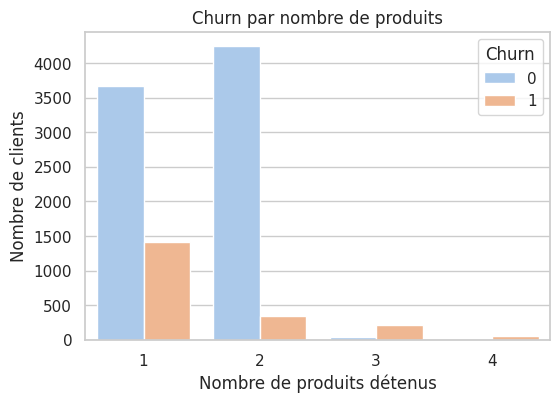

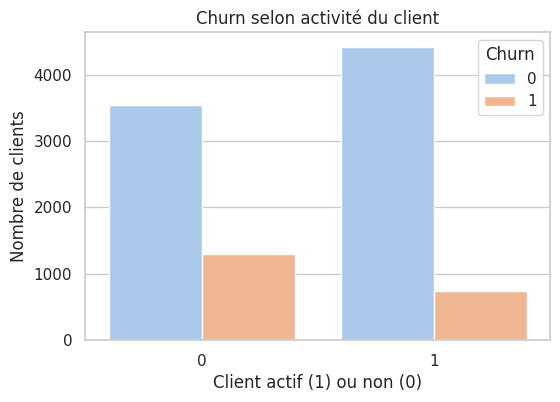

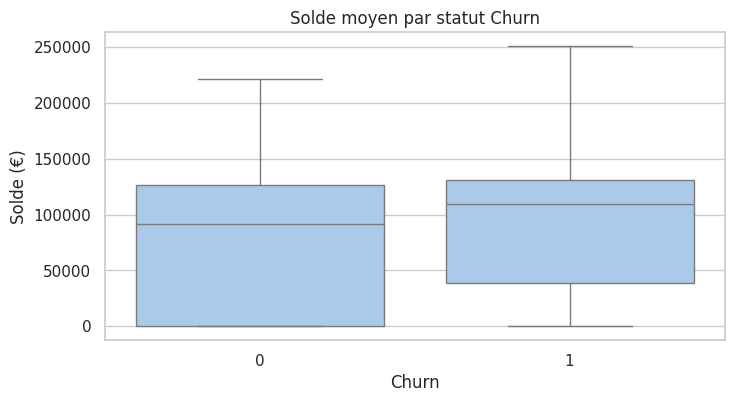

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mettre un style lisible
sns.set(style="whitegrid", palette="pastel")

# 1️⃣ Répartition du churn
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df)
plt.title('Répartition des clients churnés vs actifs')
plt.xlabel('Churn (0=non, 1=oui)')
plt.ylabel('Nombre de clients')
plt.show()

# 2️⃣ Répartition par âge
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution des âges')
plt.xlabel('Âge')
plt.ylabel('Nombre de clients')
plt.show()

# 3️⃣ Âge selon churn
plt.figure(figsize=(8,4))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Âge des clients par statut Churn')
plt.xlabel('Churn')
plt.ylabel('Âge')
plt.show()

# 4️⃣ Répartition par score de crédit
plt.figure(figsize=(8,4))
sns.histplot(df['CreditScore'], bins=30, kde=True)
plt.title('Distribution du Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Nombre de clients')
plt.show()

# 5️⃣ Churn en fonction du nombre de produits
plt.figure(figsize=(6,4))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Churn par nombre de produits')
plt.xlabel('Nombre de produits détenus')
plt.ylabel('Nombre de clients')
plt.legend(title='Churn')
plt.show()

# 6️⃣ Churn en fonction de l’activité
plt.figure(figsize=(6,4))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Churn selon activité du client')
plt.xlabel('Client actif (1) ou non (0)')
plt.ylabel('Nombre de clients')
plt.legend(title='Churn')
plt.show()

# 7️⃣ Boxplot Balance par Churn
plt.figure(figsize=(8,4))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Solde moyen par statut Churn')
plt.xlabel('Churn')
plt.ylabel('Solde (€)')
plt.show()


In [8]:
# Afficher les statistiques descriptives
df.describe()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [10]:
from sklearn.preprocessing import StandardScaler

# Liste des colonnes qu'on veut standardiser
cols_to_scale = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'EstimatedSalary',
    'Point Earned'
]

# On crée l'objet scaler
scaler = StandardScaler()

# On applique le scaler et on remplace les colonnes
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Vérifier le résultat
df.head()



,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,-0.326221,0,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,1,2,-0.630839,False,False,False,False,False
1,-0.440036,0,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,1,3,-0.666251,False,True,False,False,False
2,-1.536794,0,0.293517,1.032908,1.333053,3,1,0,0.240687,1,1,3,-1.015942,False,False,False,False,False
3,0.501521,0,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,0,5,-1.135457,False,False,True,False,False
4,2.063884,0,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,0,5,-0.803472,False,True,True,False,False
